In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style("white")
%matplotlib inline
#Hypothesis testing
import scipy.stats as stats
from scipy.stats import t


In [37]:
#read files 
battles = pd.read_csv("battles.csv")
character_predictions = pd.read_csv("character-predictions.csv")
character_deaths = pd.read_csv("character-deaths.csv")

In [38]:
data = battles.groupby("region").sum()[["major_death", "major_capture"]]
print (data)

                 major_death  major_capture
region                                     
Beyond the Wall          1.0            1.0
The Crownlands           2.0            1.0
The North                1.0            2.0
The Reach                0.0            0.0
The Riverlands           6.0            6.0
The Stormlands           1.0            0.0
The Westerlands          2.0            1.0


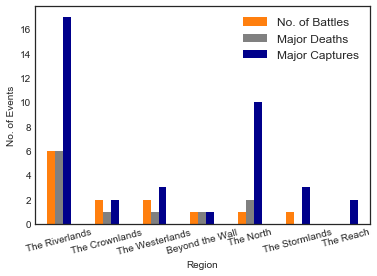

In [39]:
#Hypothesis testing 1
#Bar chart for analysing the relation between evets and major deaths/captures.
p = pd.concat([data, battles.region.value_counts().to_frame()], axis = 1).sort_values("major_death", ascending = False).copy(deep = True).plot.bar(color = [sns.color_palette()[1], "grey", "darkblue"], rot = 15)
_ = p.set(xlabel = "Region", ylabel = "No. of Events"), p.legend(["No. of Battles", "Major Deaths", "Major Captures"], fontsize = 12.)

In [40]:
#We look at the data of attacker size and defender size of each region for hypothesis testing #3
rgn = battles.groupby('region').sum()[["attacker_size", "defender_size"]]
print(rgn)

                 attacker_size  defender_size
region                                       
Beyond the Wall       100000.0         1240.0
The Crownlands         24000.0         7250.0
The North              11646.0        11100.0
The Reach                  NaN            NaN
The Riverlands         68975.0        68345.0
The Stormlands          7000.0        20200.0
The Westerlands        27000.0        14000.0


In [41]:
popAlive =character_predictions.groupby("popularity").sum()[["isAlive"]]
print(popAlive)

            isAlive
popularity         
0.000000         72
0.003344         80
0.006689        106
0.010033        102
0.013378        106
0.016722        104
0.020067         72
0.023411         68
0.026756         57
0.030100         29
0.033445         32
0.036789         28
0.040134         27
0.043478         38
0.046823         26
0.050167         29
0.053512         16
0.056856         15
0.060201         20
0.063545         20
0.066890         15
0.070234         17
0.073579         14
0.076923         15
0.080268         16
0.083612         14
0.086957         16
0.090301          8
0.093645          2
0.096990          5
...             ...
0.605351          0
0.618729          1
0.622074          0
0.625418          0
0.638796          0
0.655518          1
0.658863          0
0.665552          1
0.668896          0
0.675585          0
0.678930          0
0.695652          0
0.705686          1
0.709030          2
0.719064          1
0.722408          1
0.739130          1


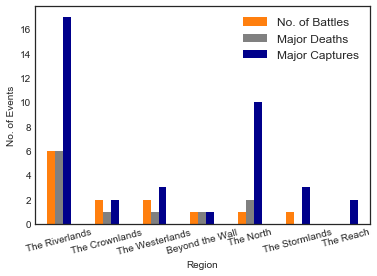

In [42]:
p = pd.concat([data, battles.region.value_counts().to_frame()], axis = 1).sort_values("major_death", ascending = False).copy(deep = True).plot.bar(color = [sns.color_palette()[1], "grey", "darkblue"], rot = 15)
_ = p.set(xlabel = "Region", ylabel = "No. of Events"), p.legend(["No. of Battles", "Major Deaths", "Major Captures"], fontsize = 12.)


In [43]:
popAlive.describe()

,isAlive
count,166.000000
mean,8.740964
std,20.147917
min,0.000000
25%,0.250000
50%,1.000000
75%,6.000000
max,106.000000


In [46]:
data = pd.read_csv("character-predictions.csv")

In [47]:
#P value testing
N = data.count()
meanpop = data.mean()["popularity"]
meanalive = data.mean()["isAlive"]
varpop = data.var()["popularity"]
varalive = data.var()["isAlive"]
s = np.sqrt(varpop + varalive)
t = ((meanalive - meanpop)/(s*np.sqrt(2/N)))
df = 2*N -2
p= 1- stats.t.cdf(t,df=df)
print (p.mean())

2.09913347242e-06


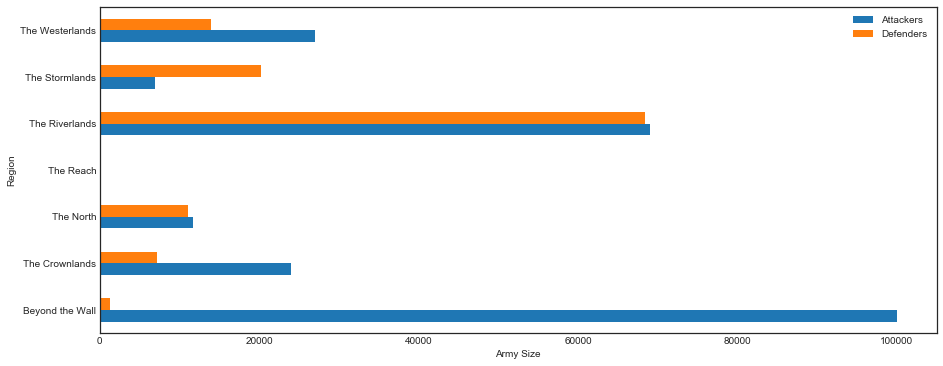

In [19]:
#Hypothesis testing 3
#We look at the army size in a region and its relation with the major deaths/captures
rgn = battles.groupby('region').sum()[["attacker_size", "defender_size",]].plot(kind='barh', figsize=(15,6), rot=0)
_ = rgn.set_xlabel("Army Size"), rgn.set_ylabel("Region"), rgn.legend(["Attackers", "Defenders"])
